In [41]:
data_dir = '../crawl_data/data/images'
label_path = '../crawl_data/data/labels.txt'
filtered_label_path = '../crawl_data/data/filtered_labels.txt'

In [6]:
import os

print('Filtering ...')

new_labels = []
with open(label_path, 'r') as f:
    lines = [line.strip() for line in f.readlines()]
    
    for line in lines:
        
        if '9999' not in line:
            new_labels.append(line)
        
        else:
            name = line.split(' ')[0]
            path = os.path.join(data_dir, name)
            os.remove(path)

print('Saving ...')           
with open(filtered_label_path, 'w') as f:
    f.write('\n'.join(new_labels))
    
print('Done!')


Filtering ...
Saving ...
Done!


In [17]:
import matplotlib.pyplot as plt

images = []
labels = []

for label in new_labels:
    splits = label.split(' ')
    images.append(splits[0])
    labels.append(int(splits[1]))

In [20]:
import numpy as np
labels = np.array(labels)
cnts = []
for i in range(1, 6):
    cnts.append(np.sum(labels == i))

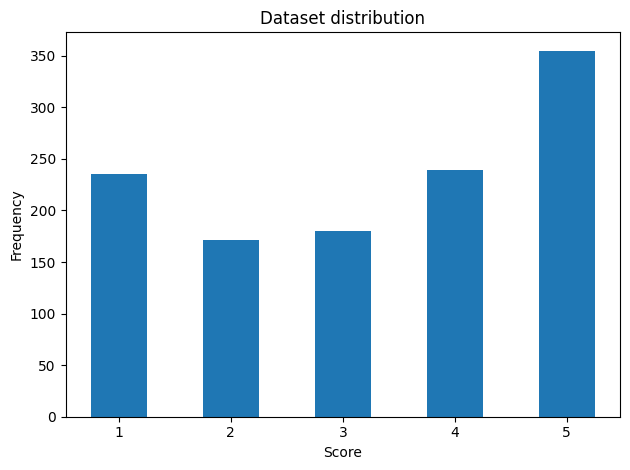

In [25]:
plt.bar(range(1, 6), cnts, width=0.5)
plt.title('Dataset distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [26]:
# Random sampling
summary = {}
for i, label in enumerate(labels):
    if label not in summary:
        summary[label] = [images[i]]
    else:
        summary[label].append(images[i])


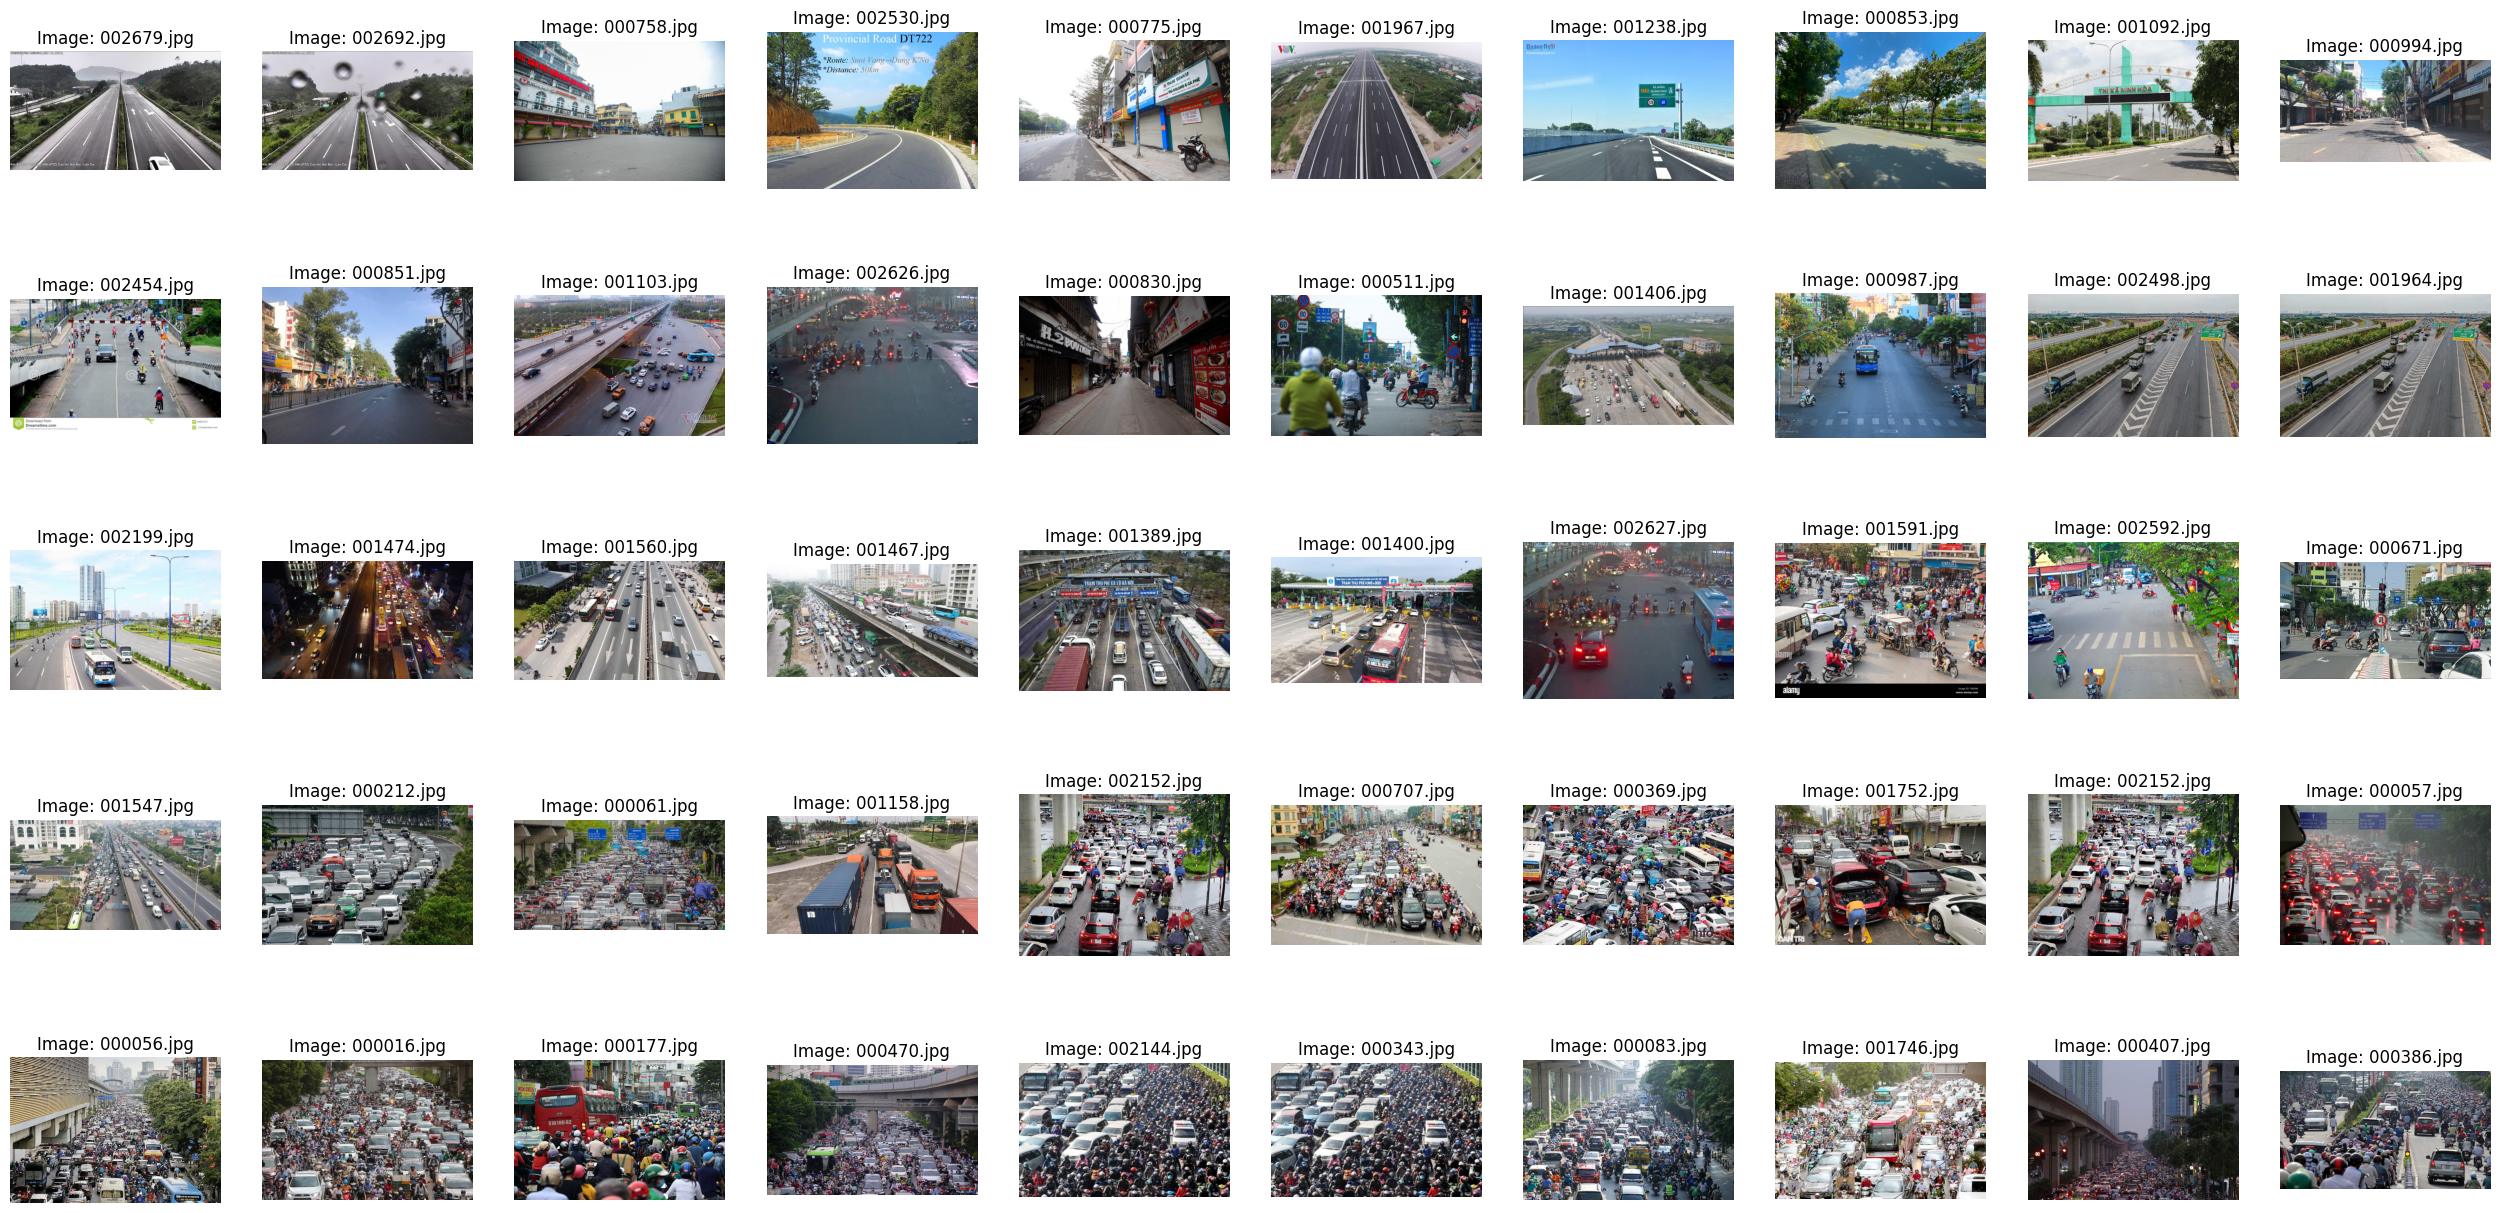

In [42]:
import random
from PIL import Image

n_samples = 10
plt.figure(figsize=(32, 16))
for label in range(1, 6):
    samples = random.choices(summary[label], k=n_samples)
    
    for i in range(n_samples):
        plt.subplot(5, n_samples, (label - 1) * n_samples + i + 1)
        plt.title('Image: ' + samples[i])
        image = Image.open(os.path.join(data_dir, samples[i]))
        plt.imshow(image)
        plt.axis('off')
        # plt.tight_layout()

plt.show()

In [2]:
# Move file to specific folder
data_dir = '../crawl_data/data/images'
label_path = '../crawl_data/data/labels.txt'
save_dir = '../crawl_data/data'

from pathlib import Path
import shutil
import os

# Create dir
for i in range(1, 6):
    path = os.path.join(save_dir, str(i))
    Path(path).mkdir(parents=True, exist_ok=True)

with open(label_path, 'r') as f:
    lines = [line.strip() for line in f.readlines()]
    
    for line in lines:
        strips = line.split(' ')
        
        shutil.move(os.path.join(data_dir, strips[0]), os.path.join(save_dir, strips[1], strips[0]))
        
print('Done!')
        
        


Done!


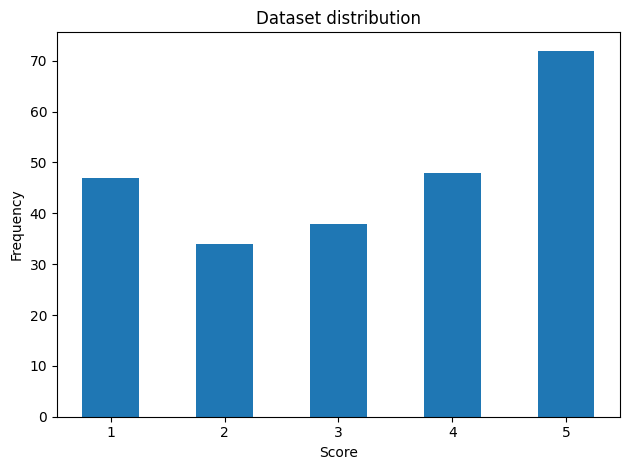

In [12]:
import matplotlib.pyplot as plt
test_dir = os.path.join(save_dir, 'val')
counts = [len(os.listdir(os.path.join(test_dir, str(i)))) for i in range(1, 6)]
plt.bar(range(1, 6), counts, width=0.5)
plt.title('Dataset distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

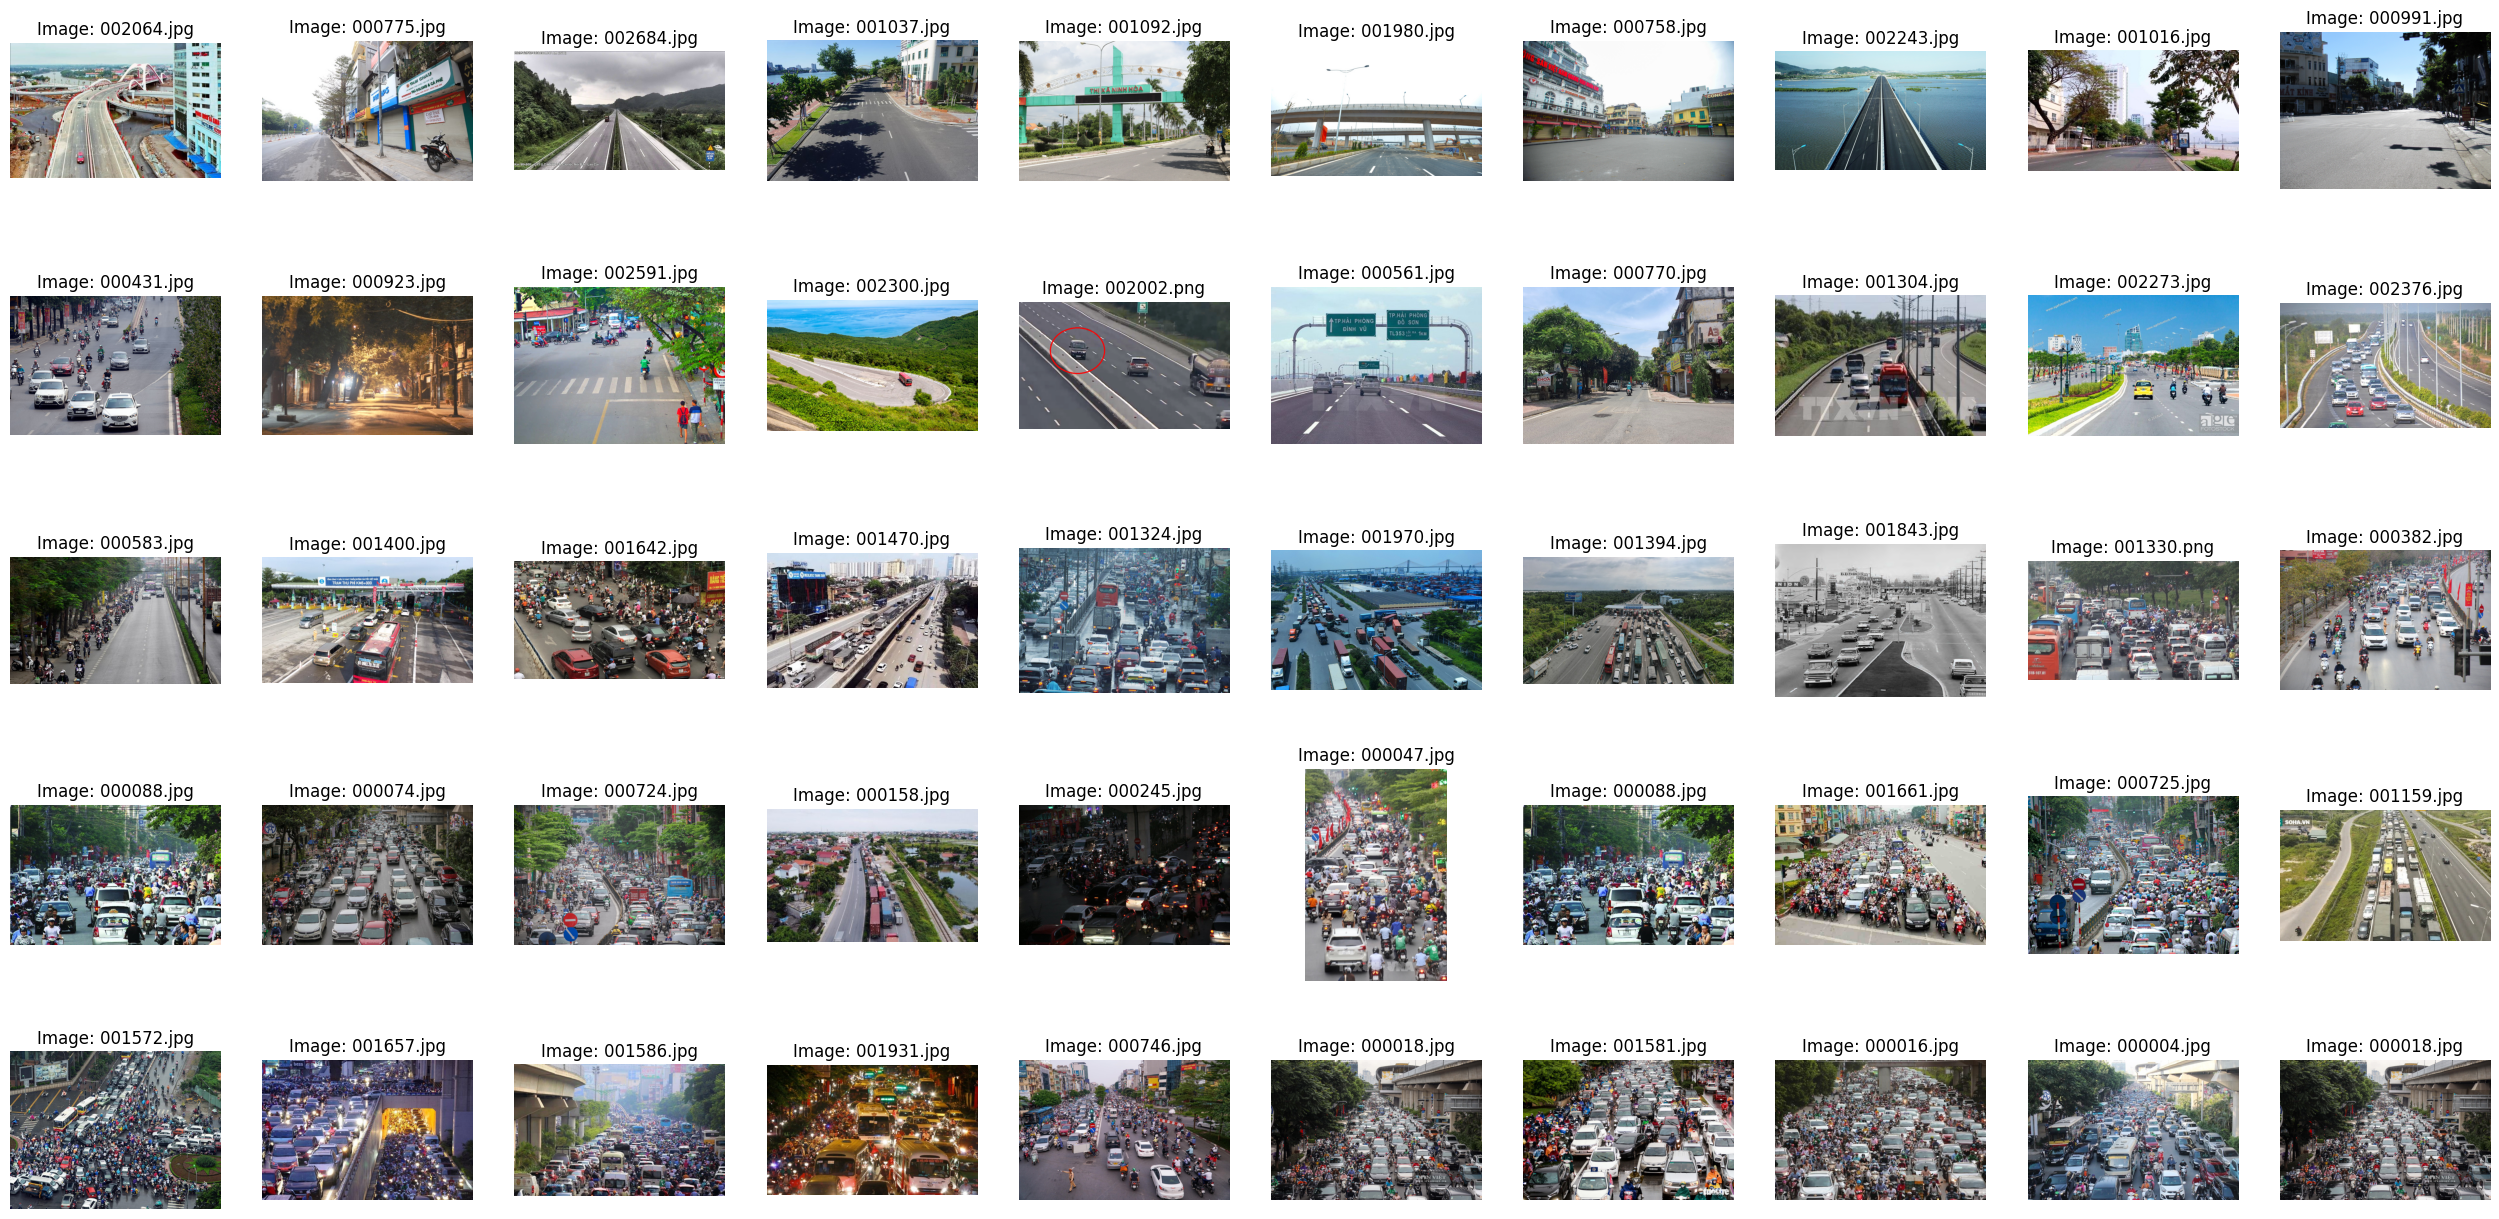

In [8]:
import random
from PIL import Image

n_samples = 10
plt.figure(figsize=(32, 16))
for label in range(1, 6):
    samples = random.choices(os.listdir(os.path.join(save_dir, str(label))), k=n_samples)
    
    for i in range(n_samples):
        plt.subplot(5, n_samples, (label - 1) * n_samples + i + 1)
        plt.title('Image: ' + samples[i])
        image = Image.open(os.path.join(save_dir, str(label), samples[i]))
        plt.imshow(image)
        plt.axis('off')
        # plt.tight_layout()

plt.show()

In [10]:
import math
import glob
random.seed(2022)

val_ratio = 0.2

for i in range(1, 6):
    Path(os.path.join(save_dir, 'train', str(i))).mkdir(parents=True, exist_ok=True)
    Path(os.path.join(save_dir, 'val', str(i))).mkdir(parents=True, exist_ok=True)
    
for label in range(1, 6):
    
    print('Process class {}'.format(label))
    
    images = sorted(glob.glob(os.path.join(save_dir, str(label), '*')))
    
    random.shuffle(images)
    
    border = math.floor((1 - val_ratio) * len(images))
    
    for i, image in enumerate(images):
        image_name = image.split(os.path.sep)[-1]
        if i >= border:
            shutil.move(image, os.path.join(save_dir, 'val', str(label), image_name))
        else:
            shutil.move(image, os.path.join(save_dir, 'train', str(label), image_name))
    
print('Done!')

Process class 1
Process class 2
Process class 3
Process class 4
Process class 5
Done!
